In [15]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

import gymnasium as gym

import warnings
warnings.filterwarnings('ignore')

In [16]:
gym.__version__

'0.28.1'

In [17]:
def get_epsilon_greedy_action(q_values, epsilon, action_n):
    
    policy = np.ones(action_n) * epsilon / action_n
    max_action = np.argmax(q_values)
    policy[max_action] += 1 - epsilon
    
    return np.random.choice(np.arange(action_n), p=policy)

In [18]:
def SARSA(env, episode_n, gamma=0.99, trajectory_len=500, alpha=0.5):
    total_rewards = []   # Создаем массив для хранения общих вознаграждений для каждого эпизода
    
    state_n = env.observation_space.n  # Получаем количество состояний в среде
    action_n = env.action_space.n  # Получаем количество действий в среде
    qfunction = np.zeros((state_n, action_n))  # Создаем Q-функцию (матрицу состояние-действие) и инициализируем её нулями
    
    for episode in tqdm(range(episode_n)):  # Запускаем цикл для каждого эпизода
        epsilon = 1 / (episode + 1)  # Уменьшаем параметр epsilon для epsilon-жадной стратегии с каждым эпизодом
        total_reward = 0  # Инициализируем общую сумму вознаграждений для каждого эпизода
        state = env.reset()[0]  # Сбрасываем среду и получаем начальное состояние
        action = get_epsilon_greedy_action(qfunction[state], epsilon, action_n)  # Получаем действие с использованием epsilon-жадной стратегии
        
        for t_n in range(trajectory_len):  # Запускаем цикл для каждого шага внутри эпизода (ограниченного trajectory_len)
            next_state, reward, done, _, _ = env.step(action)  # Выполняем выбранное действие и получаем следующее состояние, вознаграждение и флаг завершения
            next_action = get_epsilon_greedy_action(qfunction[next_state], epsilon, action_n)  # Получаем следующее действие с использованием epsilon-жадной стратегии
            
            qfunction[state][action] += alpha * (reward + gamma * qfunction[next_state][next_action] - qfunction[state][action])  # Обновляем Q-функцию согласно формуле метода SARSA
            
            state = next_state  # Переходим в следующее состояние
            action = next_action  # Переходим в следующее действие
            total_reward += reward  # Добавляем вознаграждение к общей сумме вознаграждений для эпизода

            if done:  # Если эпизод завершился, выходим из цикла
                break
        
        total_rewards.append(total_reward) # Добавляем полученное вознаграждение к общему вознаграждению текущего эпизода
            
    return total_rewards  # Возвращаем массив общих вознаграждений для каждого эпизода

In [19]:
def QLearning(env, episode_n, noisy_episode_n, gamma=0.99, t_max=500, alpha=0.5):
    state_n = env.observation_space.n  # Получаем количество состояний в среде
    action_n = env.action_space.n  # Получаем количество действий в среде
    
    Q = np.zeros((state_n, action_n))  # Создаем Q-функцию (матрицу состояние-действие) и инициализируем её нулями
    epsilon = 1  # Инициализируем действием рандомный шанс
    
    total_rewards = []  # Создаем массив для хранения общих вознаграждений для каждого эпизода
    for episode in tqdm(range(episode_n)):  # Запускаем цикл для каждого эпизода
        epsilon = 1 / (episode + 1)  # Уменьшаем параметр epsilon для epsilon-жадной стратегии с каждым эпизодом
        total_reward = 0  # Инициализируем общую сумму вознаграждений для каждого эпизода
        state, _ = env.reset()  # Инициализируем состояние и действие в среде

        for t in range(t_max):  # Запускаем цикл для каждого шага в эпизоде
            
            action = get_epsilon_greedy_action(Q[state], epsilon, action_n)  # Делаем действие с шансом epsilon
            next_state, reward, done, _, _ = env.step(action)  # Делаем шаг в среде и получаем результат
            
            Q[state][action] += alpha * (reward + gamma * np.max(Q[next_state, :]) - Q[state][action])  # Обновляем Q-функцию
            
            total_reward += reward  # Добавляем вознаграждение к общей сумме вознаграждений для эпизода
            
            if done:  # Если эпизод завершён, то выходим из цикла 
                break
                
            state = next_state  # Обновляем состояние в среде
            
        epsilon = max(0, epsilon - 1 / noisy_episode_n)  # Обновляем действием шанс
        
        total_rewards.append(total_reward)  # Добавляем вознаграждение к общей сумме вознаграждений для эпизода
        
    return total_rewards  # Возвращаем общие вознаграждения для каждого эпизода

# Taxi

In [20]:
env = gym.make("Taxi-v3")

100%|██████████| 500/500 [00:00<00:00, 771.88it/s] 


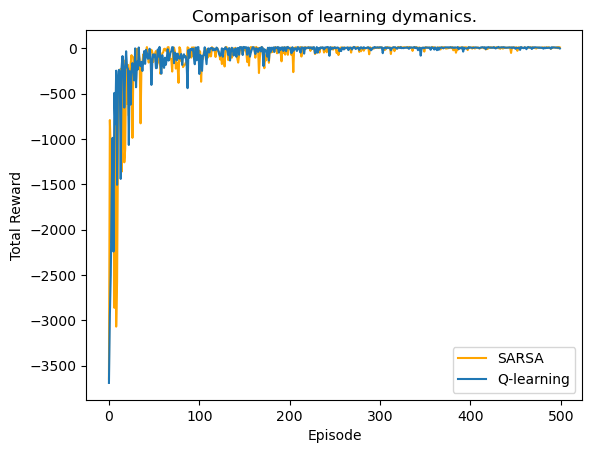

In [21]:
total_rewards_SARSA = SARSA(env, episode_n=500, trajectory_len=1000, gamma=0.999, alpha=0.5)
total_rewards_q = QLearning(env, episode_n=500, noisy_episode_n=400, t_max=1000, gamma=0.999, alpha=0.5)

plt.plot(total_rewards_SARSA, color='orange', label='SARSA')
plt.plot(total_rewards_q, label='Q-learning')
plt.title('Comparison of learning dymanics.')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.legend()
plt.show()

100%|██████████| 500/500 [00:00<00:00, 850.05it/s] 


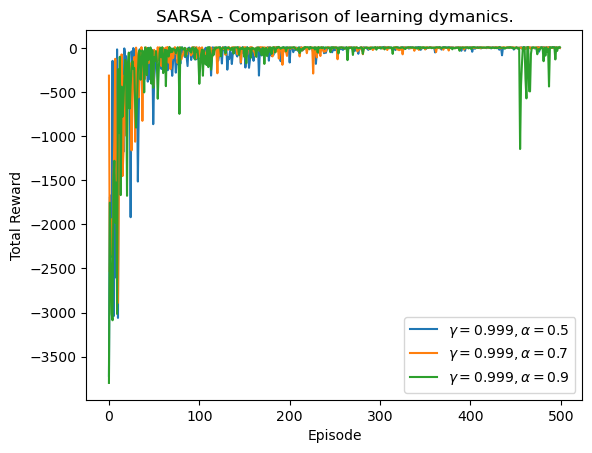

In [21]:
gamma = [0.999, 0.95, 0.9]
alpha = [0.5, 0.7, 0.9]
for a in alpha:
    total_rewards_SARSA = SARSA(env, episode_n=500, trajectory_len=1000, gamma=gamma[0], alpha=a)
    plt.plot(total_rewards_SARSA, label=f'$\gamma={gamma[0]}, \\alpha={a}$')

plt.title('SARSA - Comparison of learning dymanics.')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.legend()
plt.show()

100%|██████████| 500/500 [00:02<00:00, 226.76it/s]


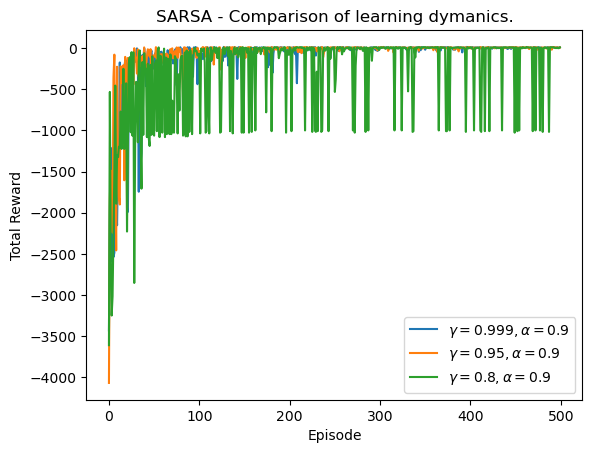

In [10]:
gamma = [0.999, 0.95, 0.8]
alpha = [0.5, 0.9, 0.1]
for g in gamma:
    total_rewards_SARSA = SARSA(env, episode_n=500, trajectory_len=1000, gamma=g, alpha=alpha[0])
    plt.plot(total_rewards_SARSA, label=f'$\gamma={g}, \\alpha={a}$')

plt.title('SARSA - Comparison of learning dymanics.')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.legend()
plt.show()

# Cliff

100%|██████████| 100/100 [00:00<00:00, 1304.56it/s]


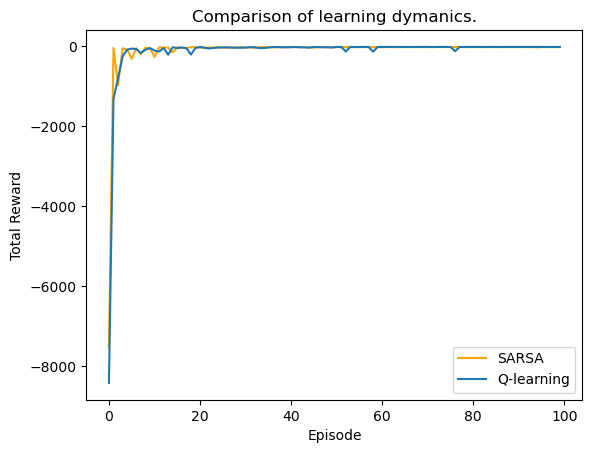

In [11]:
env = gym.make('CliffWalking-v0')

total_rewards_SARSA = SARSA(env, episode_n=100, trajectory_len=1000, gamma=0.999, alpha=0.5)
total_rewards_q = QLearning(env, episode_n=100, noisy_episode_n=400, t_max=1000, gamma=0.999, alpha=0.5)

plt.plot(total_rewards_SARSA, color='orange', label='SARSA')
plt.plot(total_rewards_q, label='Q-learning')
plt.title('Comparison of learning dymanics.')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.legend()
plt.show()

# FrozenLake

100%|██████████| 500/500 [00:03<00:00, 144.05it/s]


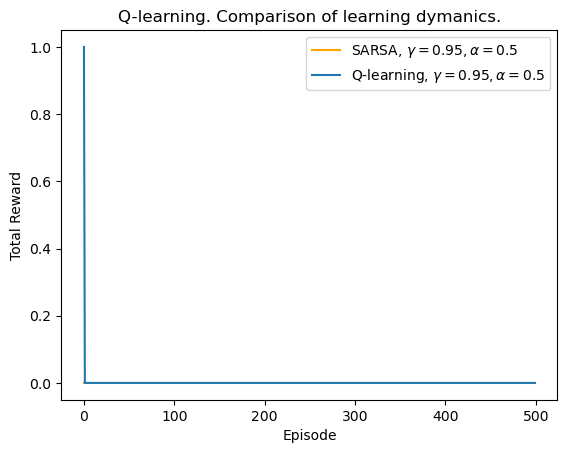

In [30]:
from gymnasium.envs.toy_text.frozen_lake import generate_random_map

env = gym.make('FrozenLake-v1', desc=generate_random_map(size=4), is_slippery=False)

total_rewards_SARSA = SARSA(env, episode_n=500, trajectory_len=500, gamma=0.99, alpha=0.5)
total_rewards_q_1 = QLearning(env, episode_n=500, noisy_episode_n=400, t_max=500, gamma=0.999, alpha=0.5)

plt.plot(total_rewards_SARSA, color='orange', label='SARSA, $\gamma = 0.95, \\alpha=0.5$')
plt.plot(total_rewards_q_1, label='Q-learning, $\gamma = 0.95, \\alpha=0.5$')
plt.title('Q-learning. Comparison of learning dymanics.')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.legend()
plt.show()